In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble._forest import RandomForestClassifier
import pickle
import sklearn
import scipy

import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


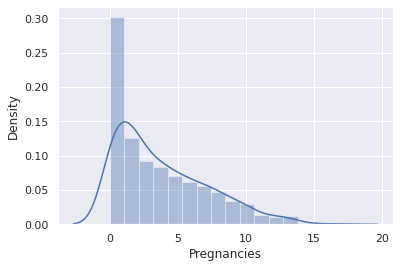

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


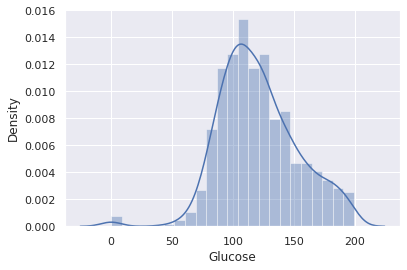

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


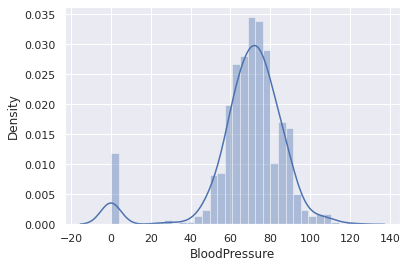

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


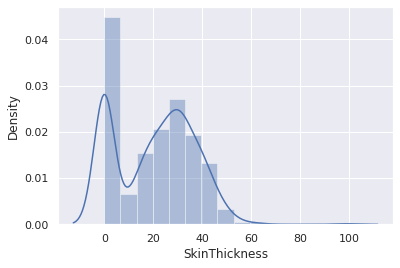

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


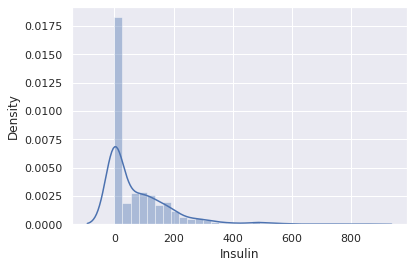

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


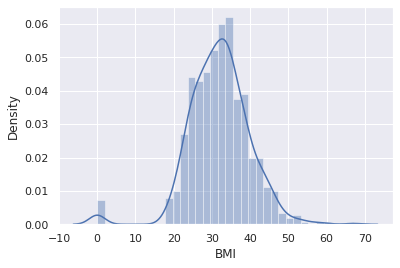

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


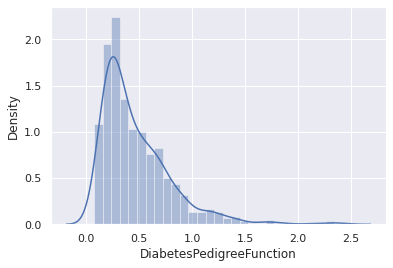

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


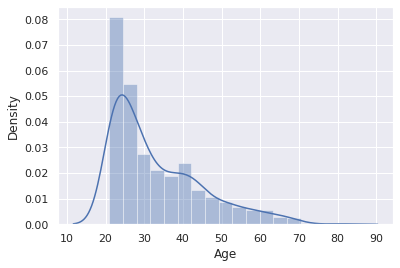

<ipython-input-6-362423a18e1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


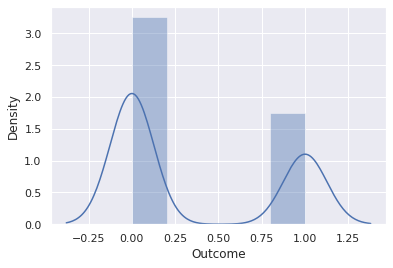

In [ ]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()
    

In [ ]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [ ]:
data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())

In [ ]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())

In [ ]:
data['SkinThickness'].mean(), data['SkinThickness'].median() 

(29.153419593345657, 29.0)

In [ ]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

In [ ]:
data['Insulin'].mean(), data['Insulin'].median() 

(155.5482233502538, 125.0)

In [ ]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [ ]:
data['BMI'].mean(), data['BMI'].median() 

(32.457463672391015, 32.3)

In [ ]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])


In [ ]:
finalDf = pd.concat([principalDf, data[['Outcome']]], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [ ]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [ ]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [ ]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [ ]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [ ]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [ ]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.758957654723127
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8013029315960912
Test score : 0.7662337662337663
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.745928338762215
Test score : 0.7857142857142857
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.6883116883116883
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.8116883116883117


In [ ]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 14],
       [14, 33]])

In [ ]:

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,14,107
1,14,33,47
All,107,47,154


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.85, 0.12, 0.02, 0.51, 0.18, 0.  , 0.84, 0.86, 0.36, 0.43, 0.71,
       0.8 , 0.15, 0.22, 0.39, 0.61, 0.8 , 0.03, 0.41, 0.23, 0.64, 0.08,
       0.09, 0.15, 0.03, 0.41, 0.03, 0.85, 0.  , 0.17, 0.47, 0.22, 0.18,
       0.59, 0.04, 0.79, 0.44, 0.01, 0.26, 0.71, 0.21, 0.12, 0.13, 0.76,
       0.72, 0.08, 0.08, 0.14, 0.45, 0.31, 0.34, 0.13, 0.86, 0.64, 0.21,
       0.02, 0.2 , 0.45, 0.29, 0.52, 0.65, 0.75, 0.06, 0.73, 0.92, 0.47,
       0.68, 0.1 , 0.69, 0.2 , 0.09, 0.19, 0.08, 0.78, 0.91, 0.41, 0.13,
       0.62, 0.29, 0.3 , 0.3 , 0.48, 0.17, 0.  , 0.12, 0.25, 0.09, 0.24,
       0.84, 0.07, 0.43, 0.26, 0.17, 0.01, 0.74, 0.17, 0.36, 0.48, 0.39,
       0.58, 0.25, 0.  , 0.24, 0.01, 0.67, 0.74, 0.14, 0.65, 0.06, 0.52,
       0.04, 0.52, 0.63, 0.56, 0.68, 0.65, 0.06, 0.33, 0.14, 0.78, 0.55,
       0.49, 0.2 , 0.24, 0.05, 0.  , 0.27, 0.51, 0.27, 0.37, 0.46, 0.38,
       0.02, 0.69, 0.26, 0.65, 0.31, 0.6 , 0.41, 0.14, 0.04, 0.83, 0.  ,
       0.05, 0.72, 0.01, 0.06, 0.12, 0.06, 0.27, 0.

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.         0.         0.         0.00934579 0.00934579
 0.01869159 0.01869159 0.01869159 0.02803738 0.02803738 0.03738318
 0.04672897 0.04672897 0.04672897 0.06542056 0.06542056 0.07476636
 0.08411215 0.09345794 0.09345794 0.11214953 0.11214953 0.12149533
 0.12149533 0.13084112 0.13084112 0.13084112 0.14018692 0.1588785
 0.17757009 0.17757009 0.17757009 0.19626168 0.22429907 0.23364486
 0.25233645 0.26168224 0.28037383 0.28971963 0.30841121 0.31775701
 0.3364486  0.36448598 0.38317757 0.42056075 0.42990654 0.46728972
 0.4953271  0.5046729  0.52336449 0.56074766 0.57943925 0.60747664
 0.63551402 0.6728972  0.69158879 0.71028037 0.73831776 0.74766355
 0.79439252 0.81308411 0.85046729 0.90654206 0.94392523 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.0212766  0.04255319 0.08510638 0.10638298 0.14893617
 0.14893617 0.19148936 0.21276596 0.23404255 0.25531915 0.25531915
 0.27659574 0.

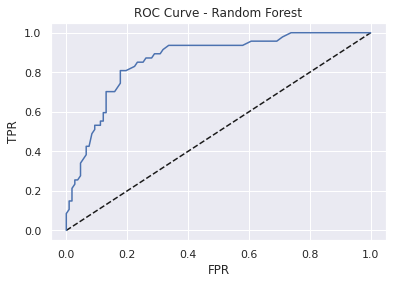

0.8618015510041758

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()
roc_auc_score(y_test,y_pred_prob)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7410100475938657 0.07300362513214102


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [ ]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7638551031200423
best_parameters =  {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 50}


In [ ]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [13, 34]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       107
           1       0.72      0.72      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154



In [ ]:
filename = 'diabetesmodel.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))

In [ ]:
model = open('diabetesmodel.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[94, 13],
       [13, 34]])

In [ ]:
from google.colab import files
files.download('diabetesmodel.pkl')